In [1]:
import wandb
from fddbenchmark import FDDDataset, FDDDataloader, FDDEvaluator
from fdd_defense.attacks import FGSMAttack, PGDAttack, DeepfoolLinfAttack, NoiseAttack
from fdd_defense.models.base import BaseTorchModel
from fdd_defense.models import LinearModel
import torch. nn as nn
from torch.optim import Adam
import torch
import torch.nn.functional as F
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from fdd_defense.defenders import DistillationDefender, QuantizationDefender, AdversarialTrainingDefender

In [2]:
dataset = FDDDataset(name='small_tep')
dataset.df.head()
scaler = StandardScaler()
scaler.fit(dataset.df[dataset.train_mask])
dataset.df[:] = scaler.transform(dataset.df)

Reading data/small_tep/test_mask.csv: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 153300/153300 [00:00<00:00, 3938542.79it/s]


In [3]:

def train():
   with wandb.init() as run:
       config = wandb.config
       model = LinearModel(**config)
       for epoch in range(config["num_epochs"]):
           loss = model.fit(dataset)  # your model training code here
           wandb.log({"loss": loss, "epoch": epoch})

sweep_config = {
 "name" : "my-sweep",
 "method" : "bayes",
 "metric" : {'goal': "minimize",
            'name': 'loss'},
   
 "parameters" : {
     "step_size" :{
     "value": 1,
   },
  
   "num_epochs" : {
     "min":1,
       "max":12
   },
   "batch_size" :{
     "min": 10,
     "max": 150
   },
   "lr" :{
     "min": 0.001,
     "max": 0.05
   },
   "window_size" :{
     "value": 10
   }
     
     
     
   
 }
}

sweep_id = "8abxjo00"
count = 2 # number of runs to execute
wandb.agent(sweep_id, function=train, count=count)

KeyboardInterrupt: 

In [3]:
window_size = 10

fddmodel = LinearModel(
        window_size=window_size,
        step_size=1,
        num_epochs=29,
        batch_size=166,
        lr=0.004209,
    )
fddmodel.fit(dataset)

Creating sequence of samples: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 105/105 [00:00<00:00, 3397.72it/s]


Epochs ...:   0%|          | 0/29 [00:00<?, ?it/s]

Steps ...:   0%|          | 0/310 [00:00<?, ?it/s]

Epoch 1, Loss: 1.3031


Steps ...:   0%|          | 0/310 [00:00<?, ?it/s]

Epoch 2, Loss: 1.0852


Steps ...:   0%|          | 0/310 [00:00<?, ?it/s]

Epoch 3, Loss: 1.0495


Steps ...:   0%|          | 0/310 [00:00<?, ?it/s]

Epoch 4, Loss: 1.0327


Steps ...:   0%|          | 0/310 [00:00<?, ?it/s]

Epoch 5, Loss: 1.0220


Steps ...:   0%|          | 0/310 [00:00<?, ?it/s]

Epoch 6, Loss: 1.0143


Steps ...:   0%|          | 0/310 [00:00<?, ?it/s]

Epoch 7, Loss: 1.0084


Steps ...:   0%|          | 0/310 [00:00<?, ?it/s]

Epoch 8, Loss: 1.0037


Steps ...:   0%|          | 0/310 [00:00<?, ?it/s]

Epoch 9, Loss: 0.9996


Steps ...:   0%|          | 0/310 [00:00<?, ?it/s]

Epoch 10, Loss: 0.9960


Steps ...:   0%|          | 0/310 [00:00<?, ?it/s]

Epoch 11, Loss: 0.9929


Steps ...:   0%|          | 0/310 [00:00<?, ?it/s]

Epoch 12, Loss: 0.9901


Steps ...:   0%|          | 0/310 [00:00<?, ?it/s]

Epoch 13, Loss: 0.9876


Steps ...:   0%|          | 0/310 [00:00<?, ?it/s]

Epoch 14, Loss: 0.9853


Steps ...:   0%|          | 0/310 [00:00<?, ?it/s]

Epoch 15, Loss: 0.9833


Steps ...:   0%|          | 0/310 [00:00<?, ?it/s]

Epoch 16, Loss: 0.9813


Steps ...:   0%|          | 0/310 [00:00<?, ?it/s]

Epoch 17, Loss: 0.9795


Steps ...:   0%|          | 0/310 [00:00<?, ?it/s]

Epoch 18, Loss: 0.9778


Steps ...:   0%|          | 0/310 [00:00<?, ?it/s]

Epoch 19, Loss: 0.9762


Steps ...:   0%|          | 0/310 [00:00<?, ?it/s]

Epoch 20, Loss: 0.9747


Steps ...:   0%|          | 0/310 [00:00<?, ?it/s]

Epoch 21, Loss: 0.9733


Steps ...:   0%|          | 0/310 [00:00<?, ?it/s]

Epoch 22, Loss: 0.9719


Steps ...:   0%|          | 0/310 [00:00<?, ?it/s]

Epoch 23, Loss: 0.9707


Steps ...:   0%|          | 0/310 [00:00<?, ?it/s]

Epoch 24, Loss: 0.9703


Steps ...:   0%|          | 0/310 [00:00<?, ?it/s]

Epoch 25, Loss: 0.9685


Steps ...:   0%|          | 0/310 [00:00<?, ?it/s]

Epoch 26, Loss: 0.9673


Steps ...:   0%|          | 0/310 [00:00<?, ?it/s]

Epoch 27, Loss: 0.9664


Steps ...:   0%|          | 0/310 [00:00<?, ?it/s]

Epoch 28, Loss: 0.9654


Steps ...:   0%|          | 0/310 [00:00<?, ?it/s]

Epoch 29, Loss: 0.9645


In [4]:
test_loader = FDDDataloader(
    dataframe=dataset.df,
    mask=dataset.test_mask,
    labels=dataset.labels,
    window_size=window_size,
    step_size=1,
)
for sample, index, label in test_loader:
    pred = fddmodel.predict(sample)
pred = pd.Series(pred, index=index, name='pred')

evaluator = FDDEvaluator(step_size=1)
evaluator.print_metrics(label, pred)

Creating sequence of samples: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 105/105 [00:00<00:00, 3396.07it/s]


FDD metrics
-----------------
TPR/FPR:
    Fault 01: 0.9817/0.0000
    Fault 02: 0.9800/0.0001
    Fault 03: 0.0035/0.0000
    Fault 04: 0.9812/0.0000
    Fault 05: 0.9767/0.0000
    Fault 06: 0.8593/0.0000
    Fault 07: 0.9990/0.0000
    Fault 08: 0.4781/0.0001
    Fault 09: 0.0000/0.0000
    Fault 10: 0.0128/0.0000
    Fault 11: 0.0075/0.0000
    Fault 12: 0.2811/0.0004
    Fault 13: 0.3955/0.0003
    Fault 14: 0.0070/0.0000
    Fault 15: 0.0000/0.0000
    Fault 16: 0.0205/0.0000
    Fault 17: 0.9434/0.0001
    Fault 18: 0.8736/0.0000
    Fault 19: 0.0130/0.0000
    Fault 20: 0.7972/0.0000
Detection TPR: 0.5640
Detection FPR: 0.0009
Average Detection Delay (ADD): 76.77
Total Correct Diagnosis Rate (Total CDR): 0.8521

Clustering metrics
-----------------
Adjusted Rand Index (ARI): 0.2471
Normalized Mutual Information (NMI): 0.6309
Unsupervised Clustering Accuracy (ACC): 0.5838


In [7]:
dataset = FDDDataset(name='reinartz_tep')
dataset.df.head()
scaler = StandardScaler()
scaler.fit(dataset.df[dataset.train_mask])
dataset.df[:] = scaler.transform(dataset.df)

Reading data/reinartz_tep/test_mask.csv: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5600000/5600000 [00:02<00:00, 2663758.68it/s]


In [8]:
window_size = 10

fddmodel_M = LinearModel(
        window_size=window_size,
        step_size=1,
        num_epochs=29,
        batch_size=166,
        lr=0.004209,
    )
fddmodel_M.fit(dataset)

Creating sequence of samples: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2240/2240 [00:15<00:00, 146.67it/s]


Epochs ...:   0%|          | 0/29 [00:00<?, ?it/s]

Steps ...:   0%|          | 0/26854 [00:00<?, ?it/s]

Epoch 1, Loss: 0.4776


Steps ...:   0%|          | 0/26854 [00:00<?, ?it/s]

Epoch 2, Loss: 0.4699


Steps ...:   0%|          | 0/26854 [00:00<?, ?it/s]

Epoch 3, Loss: 0.4694


Steps ...:   0%|          | 0/26854 [00:00<?, ?it/s]

Epoch 4, Loss: 0.4691


Steps ...:   0%|          | 0/26854 [00:00<?, ?it/s]

Epoch 5, Loss: 0.4690


Steps ...:   0%|          | 0/26854 [00:00<?, ?it/s]

Epoch 6, Loss: 0.4689


Steps ...:   0%|          | 0/26854 [00:00<?, ?it/s]

Epoch 7, Loss: 0.4688


Steps ...:   0%|          | 0/26854 [00:00<?, ?it/s]

Epoch 8, Loss: 0.4687


Steps ...:   0%|          | 0/26854 [00:00<?, ?it/s]

Epoch 9, Loss: 0.4687


Steps ...:   0%|          | 0/26854 [00:00<?, ?it/s]

Epoch 10, Loss: 0.4686


Steps ...:   0%|          | 0/26854 [00:00<?, ?it/s]

Epoch 11, Loss: 0.4686


Steps ...:   0%|          | 0/26854 [00:00<?, ?it/s]

Epoch 12, Loss: 0.4685


Steps ...:   0%|          | 0/26854 [00:00<?, ?it/s]

Epoch 13, Loss: 0.4685


Steps ...:   0%|          | 0/26854 [00:00<?, ?it/s]

Epoch 14, Loss: 0.4685


Steps ...:   0%|          | 0/26854 [00:00<?, ?it/s]

Epoch 15, Loss: 0.4685


Steps ...:   0%|          | 0/26854 [00:00<?, ?it/s]

Epoch 16, Loss: 0.4684


Steps ...:   0%|          | 0/26854 [00:00<?, ?it/s]

Epoch 17, Loss: 0.4684


Steps ...:   0%|          | 0/26854 [00:00<?, ?it/s]

Epoch 18, Loss: 0.4684


Steps ...:   0%|          | 0/26854 [00:00<?, ?it/s]

Epoch 19, Loss: 0.4684


Steps ...:   0%|          | 0/26854 [00:00<?, ?it/s]

Epoch 20, Loss: 0.4684


Steps ...:   0%|          | 0/26854 [00:00<?, ?it/s]

Epoch 21, Loss: 0.4684


Steps ...:   0%|          | 0/26854 [00:00<?, ?it/s]

Epoch 22, Loss: 0.4683


Steps ...:   0%|          | 0/26854 [00:00<?, ?it/s]

Epoch 23, Loss: 0.4684


Steps ...:   0%|          | 0/26854 [00:00<?, ?it/s]

Epoch 24, Loss: 0.4683


Steps ...:   0%|          | 0/26854 [00:00<?, ?it/s]

Epoch 25, Loss: 0.4683


Steps ...:   0%|          | 0/26854 [00:00<?, ?it/s]

Epoch 26, Loss: 0.4683


Steps ...:   0%|          | 0/26854 [00:00<?, ?it/s]

Epoch 27, Loss: 0.4683


Steps ...:   0%|          | 0/26854 [00:00<?, ?it/s]

Epoch 28, Loss: 0.4683


Steps ...:   0%|          | 0/26854 [00:00<?, ?it/s]

Epoch 29, Loss: 0.4683


0.4682925707103154

In [9]:
test_loader = FDDDataloader(
    dataframe=dataset.df,
    mask=dataset.test_mask,
    labels=dataset.labels,
    window_size=window_size,
    step_size=1,
)
for sample, index, label in test_loader:
    pred = fddmodel_M.predict(sample)
pred = pd.Series(pred, index=index, name='pred')

evaluator = FDDEvaluator(step_size=1)
evaluator.print_metrics(label, pred)

Creating sequence of samples: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 560/560 [00:03<00:00, 148.51it/s]


FDD metrics
-----------------
TPR/FPR:
    Fault 01: 0.9871/0.0000
    Fault 02: 0.9870/0.0000
    Fault 03: 0.0222/0.0000
    Fault 04: 0.9881/0.0000
    Fault 05: 0.1999/0.0004
    Fault 06: 0.9993/0.0000
    Fault 07: 0.9986/0.0000
    Fault 08: 0.3443/0.0000
    Fault 09: 0.0000/0.0000
    Fault 10: 0.0000/0.0000
    Fault 11: 0.0121/0.0000
    Fault 12: 0.0000/0.0000
    Fault 13: 0.6505/0.0000
    Fault 14: 0.0002/0.0000
    Fault 15: 0.0000/0.0000
    Fault 16: 0.0000/0.0000
    Fault 17: 0.9768/0.0000
    Fault 18: 0.9450/0.0000
    Fault 19: 0.0046/0.0000
    Fault 20: 0.9748/0.0000
    Fault 21: 0.0000/0.0000
    Fault 22: 0.0000/0.0000
    Fault 23: 0.0001/0.0000
    Fault 24: 0.0000/0.0000
    Fault 25: 0.0136/0.0000
    Fault 26: 0.0416/0.0000
    Fault 27: 0.0000/0.0000
    Fault 28: 0.0000/0.0000
Detection TPR: 0.3552
Detection FPR: 0.0004
Average Detection Delay (ADD): 132.61
Total Correct Diagnosis Rate (Total CDR): 0.9195

Clustering metrics
-----------------
Adjusted

In [13]:
attack = FGSMAttack(model=fddmodel_M, eps=0.06)
for sample, index, label in test_loader:
    _sample = torch.FloatTensor(sample)
    _label = torch.LongTensor(label.values)
adv_sample = attack.attack(_sample, _label)

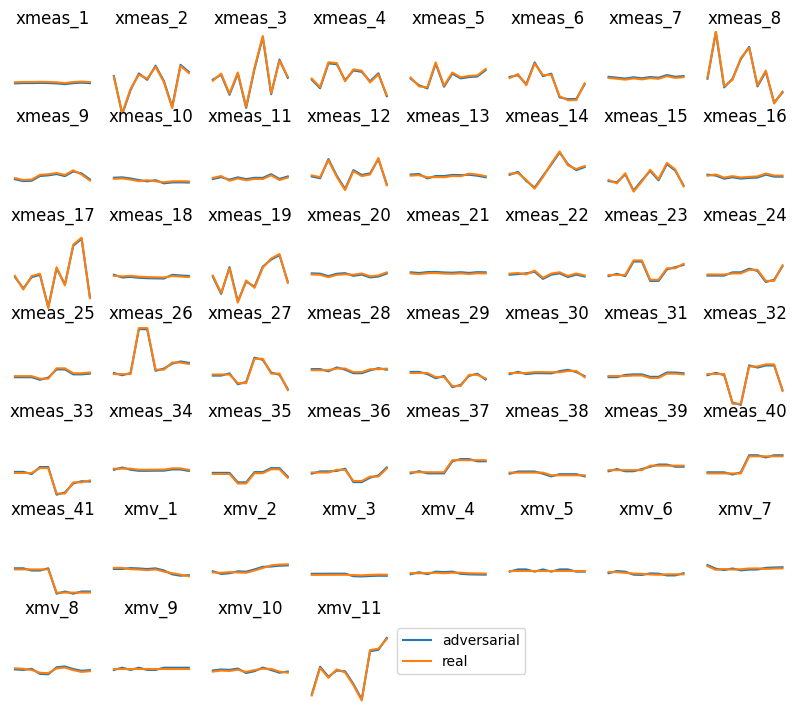

In [14]:
plt.figure(figsize=(10, 10))
for i in range(52):
    plt.subplot(8, 8, i+1)
    plt.title(dataset.df.columns[i])
    plt.plot(adv_sample.numpy()[0, :, i], label='adversarial')
    plt.plot(sample[0, :, i], label='real')
    plt.axis('off')
    plt.ylim(sample[0].min(), sample[0].max())
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [15]:
pred = fddmodel_M.predict(adv_sample)
pred = pd.Series(pred, index=index, name='pred')

evaluator = FDDEvaluator(step_size=1)
evaluator.print_metrics(label, pred)

FDD metrics
-----------------
TPR/FPR:
    Fault 01: 0.8643/0.0000
    Fault 02: 0.8327/0.0005
    Fault 03: 0.0000/0.1148
    Fault 04: 0.0000/0.0000
    Fault 05: 0.0000/0.0253
    Fault 06: 0.9980/0.0001
    Fault 07: 0.3535/0.0000
    Fault 08: 0.0068/0.3211
    Fault 09: 0.0000/0.0000
    Fault 10: 0.0000/0.0000
    Fault 11: 0.0000/0.0000
    Fault 12: 0.0000/0.0000
    Fault 13: 0.2293/0.0026
    Fault 14: 0.0000/0.0000
    Fault 15: 0.0000/0.0000
    Fault 16: 0.0000/0.0000
    Fault 17: 0.8302/0.0186
    Fault 18: 0.6286/0.0118
    Fault 19: 0.0000/0.0000
    Fault 20: 0.8285/0.0445
    Fault 21: 0.0000/0.0000
    Fault 22: 0.0000/0.0000
    Fault 23: 0.0000/0.1090
    Fault 24: 0.0000/0.0000
    Fault 25: 0.0000/0.0000
    Fault 26: 0.0000/0.0003
    Fault 27: 0.0000/0.0000
    Fault 28: 0.0000/0.0000
Detection TPR: 0.6095
Detection FPR: 0.6487
Average Detection Delay (ADD): 16.33
Total Correct Diagnosis Rate (Total CDR): 0.3265

Clustering metrics
-----------------
Adjusted 

In [37]:
attack = PGDAttack(model=fddmodel_M, eps=0.01)
for sample, index, label in test_loader:
    _sample = torch.FloatTensor(sample)
    _label = torch.LongTensor(label.values)
adv_sample = attack.attack(_sample, _label)

NameError: name 'fddmodel_M' is not defined

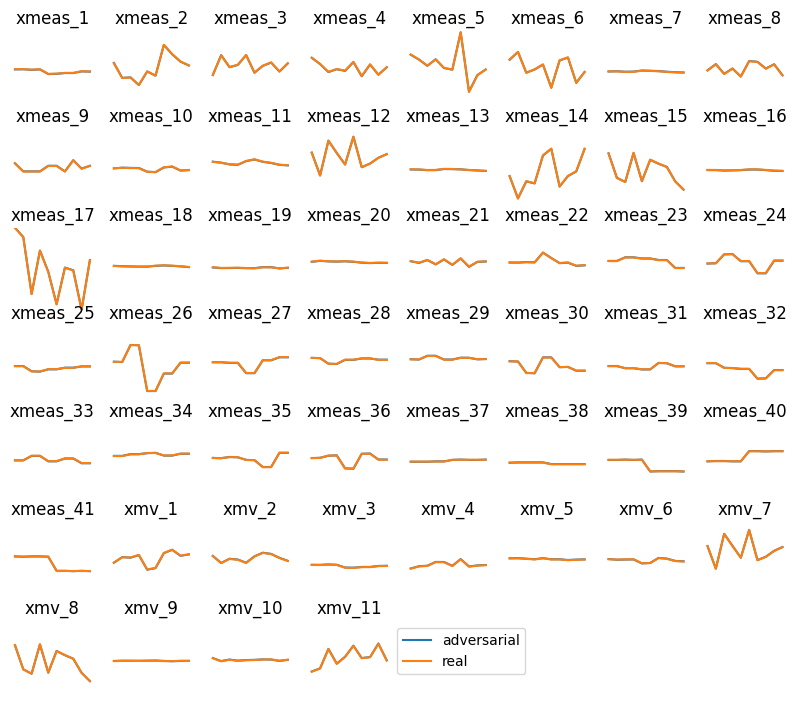

In [35]:
plt.figure(figsize=(10, 10))
for i in range(52):
    plt.subplot(8, 8, i+1)
    plt.title(dataset.df.columns[i])
    plt.plot(adv_sample.numpy()[0, :, i], label='adversarial')
    plt.plot(sample[0, :, i], label='real')
    plt.axis('off')
    plt.ylim(sample[0].min(), sample[0].max())
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [36]:
pred = fddmodel.predict(adv_sample)
pred = pd.Series(pred, index=index, name='pred')

evaluator = FDDEvaluator(step_size=1)
evaluator.print_metrics(label, pred)

FDD metrics
-----------------
TPR/FPR:
    Fault 01: 0.9787/0.0000
    Fault 02: 0.9760/0.0024
    Fault 03: 0.0000/0.0181
    Fault 04: 0.9229/0.0000
    Fault 05: 0.9605/0.0001
    Fault 06: 0.8278/0.0000
    Fault 07: 0.9985/0.0000
    Fault 08: 0.3982/0.0090
    Fault 09: 0.0000/0.0001
    Fault 10: 0.0010/0.0000
    Fault 11: 0.0018/0.0000
    Fault 12: 0.2060/0.0077
    Fault 13: 0.2954/0.0125
    Fault 14: 0.0000/0.0000
    Fault 15: 0.0000/0.0000
    Fault 16: 0.0005/0.0000
    Fault 17: 0.9317/0.0004
    Fault 18: 0.8711/0.0001
    Fault 19: 0.0018/0.0002
    Fault 20: 0.7319/0.0051
Detection TPR: 0.5631
Detection FPR: 0.0555
Average Detection Delay (ADD): 59.57
Total Correct Diagnosis Rate (Total CDR): 0.8084

Clustering metrics
-----------------
Adjusted Rand Index (ARI): 0.2267
Normalized Mutual Information (NMI): 0.5866
Unsupervised Clustering Accuracy (ACC): 0.5543


FP от 0.04%  подскочила до 5% следовательно атака аботает

In [41]:
attack = DeepfoolLinfAttack(model=fddmodel, eps=0.05,num_steps=10)
for sample, index, label in test_loader:
    _sample = torch.FloatTensor(sample)
    _label = torch.LongTensor(label.values)
adv_sample = attack.attack(_sample, _label)

In [42]:
pred = fddmodel.predict(adv_sample)
pred = pd.Series(pred, index=index, name='pred')

evaluator = FDDEvaluator(step_size=1)
evaluator.print_metrics(label, pred)

FDD metrics
-----------------
TPR/FPR:
    Fault 01: 0.3472/0.0000
    Fault 02: 0.0075/0.0000
    Fault 03: 0.0000/0.0000
    Fault 04: 0.7745/0.0001
    Fault 05: 0.9997/0.8902
    Fault 06: 0.9725/0.0000
    Fault 07: 0.2290/0.0000
    Fault 08: 0.2393/0.0001
    Fault 09: 0.0000/0.0000
    Fault 10: 0.0008/0.0000
    Fault 11: 0.0000/0.0001
    Fault 12: 0.0000/0.0000
    Fault 13: 0.0205/0.0000
    Fault 14: 0.0000/0.0000
    Fault 15: 0.0000/0.0000
    Fault 16: 0.0000/0.0000
    Fault 17: 0.0000/0.0000
    Fault 18: 0.6866/0.1092
    Fault 19: 0.0000/0.0000
    Fault 20: 0.0273/0.0000
Detection TPR: 0.9987
Detection FPR: 0.9996
Average Detection Delay (ADD): 0.00
Total Correct Diagnosis Rate (Total CDR): 0.2155

Clustering metrics
-----------------
Adjusted Rand Index (ARI): 0.0955
Normalized Mutual Information (NMI): 0.2940
Unsupervised Clustering Accuracy (ACC): 0.3174


99% FP - модельн не рабоатет


In [9]:
test_loader = FDDDataloader(
    dataframe=dataset.df,
    mask=dataset.test_mask,
    labels=dataset.labels,
    window_size=window_size,
    step_size=1,
)

Creating sequence of samples: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 105/105 [00:00<00:00, 3006.24it/s]


In [12]:

defender = AdversarialTrainingDefender(fddmodel, lambd=5)
attack = FGSMAttack(model=fddmodel, eps=0.05)
for sample, index, label in test_loader:
    _sample = torch.FloatTensor(sample)
    _label = torch.LongTensor(label.values)
adv_sample = attack.attack(_sample, _label)

Adversarial training...


Epochs ...:   0%|          | 0/29 [00:00<?, ?it/s]

Steps ...:   0%|          | 0/310 [00:00<?, ?it/s]

Epoch 1, Loss: 7.9940


Steps ...:   0%|          | 0/310 [00:00<?, ?it/s]

Epoch 2, Loss: 6.8895


Steps ...:   0%|          | 0/310 [00:00<?, ?it/s]

Epoch 3, Loss: 6.7224


Steps ...:   0%|          | 0/310 [00:00<?, ?it/s]

Epoch 4, Loss: 6.6366


Steps ...:   0%|          | 0/310 [00:00<?, ?it/s]

Epoch 5, Loss: 6.5842


Steps ...:   0%|          | 0/310 [00:00<?, ?it/s]

Epoch 6, Loss: 6.5485


Steps ...:   0%|          | 0/310 [00:00<?, ?it/s]

Epoch 7, Loss: 6.5235


Steps ...:   0%|          | 0/310 [00:00<?, ?it/s]

Epoch 8, Loss: 6.5056


Steps ...:   0%|          | 0/310 [00:00<?, ?it/s]

Epoch 9, Loss: 6.4921


Steps ...:   0%|          | 0/310 [00:00<?, ?it/s]

Epoch 10, Loss: 6.4829


Steps ...:   0%|          | 0/310 [00:00<?, ?it/s]

Epoch 11, Loss: 6.4751


Steps ...:   0%|          | 0/310 [00:00<?, ?it/s]

Epoch 12, Loss: 6.4693


Steps ...:   0%|          | 0/310 [00:00<?, ?it/s]

Epoch 13, Loss: 6.4648


Steps ...:   0%|          | 0/310 [00:00<?, ?it/s]

Epoch 14, Loss: 6.4599


Steps ...:   0%|          | 0/310 [00:00<?, ?it/s]

Epoch 15, Loss: 6.4562


Steps ...:   0%|          | 0/310 [00:00<?, ?it/s]

Epoch 16, Loss: 6.4526


Steps ...:   0%|          | 0/310 [00:00<?, ?it/s]

Epoch 17, Loss: 6.4498


Steps ...:   0%|          | 0/310 [00:00<?, ?it/s]

Epoch 18, Loss: 6.4471


Steps ...:   0%|          | 0/310 [00:00<?, ?it/s]

Epoch 19, Loss: 6.4448


Steps ...:   0%|          | 0/310 [00:00<?, ?it/s]

Epoch 20, Loss: 6.4427


Steps ...:   0%|          | 0/310 [00:00<?, ?it/s]

Epoch 21, Loss: 6.4408


Steps ...:   0%|          | 0/310 [00:00<?, ?it/s]

Epoch 22, Loss: 6.4390


Steps ...:   0%|          | 0/310 [00:00<?, ?it/s]

Epoch 23, Loss: 6.4374


Steps ...:   0%|          | 0/310 [00:00<?, ?it/s]

Epoch 24, Loss: 6.4359


Steps ...:   0%|          | 0/310 [00:00<?, ?it/s]

Epoch 25, Loss: 6.4345


Steps ...:   0%|          | 0/310 [00:00<?, ?it/s]

Epoch 26, Loss: 6.4332


Steps ...:   0%|          | 0/310 [00:00<?, ?it/s]

Epoch 27, Loss: 6.4321


Steps ...:   0%|          | 0/310 [00:00<?, ?it/s]

Epoch 28, Loss: 6.4310


Steps ...:   0%|          | 0/310 [00:00<?, ?it/s]

Epoch 29, Loss: 6.4299


In [13]:
pred = defender.predict(adv_sample)
pred = pd.Series(pred, index=index, name='pred')

evaluator = FDDEvaluator(step_size=1)
evaluator.print_metrics(label, pred)

FDD metrics
-----------------
TPR/FPR:
    Fault 01: 0.8568/0.0012
    Fault 02: 0.9514/0.0118
    Fault 03: 0.0000/0.0000
    Fault 04: 0.7071/0.0000
    Fault 05: 0.8150/0.0012
    Fault 06: 0.8168/0.0000
    Fault 07: 0.9980/0.0000
    Fault 08: 0.2283/0.0095
    Fault 09: 0.0000/0.0000
    Fault 10: 0.0000/0.0000
    Fault 11: 0.0000/0.0000
    Fault 12: 0.0708/0.0148
    Fault 13: 0.0661/0.0135
    Fault 14: 0.0000/0.0000
    Fault 15: 0.0000/0.0000
    Fault 16: 0.0000/0.0000
    Fault 17: 0.8956/0.0027
    Fault 18: 0.6108/0.0063
    Fault 19: 0.0000/0.0000
    Fault 20: 0.4884/0.1011
Detection TPR: 0.5625
Detection FPR: 0.1619
Average Detection Delay (ADD): 33.87
Total Correct Diagnosis Rate (Total CDR): 0.6672

Clustering metrics
-----------------
Adjusted Rand Index (ARI): 0.1769
Normalized Mutual Information (NMI): 0.4852
Unsupervised Clustering Accuracy (ACC): 0.4872
